## Import Libraries


In [224]:
#import pandas 
import pandas as pd
import numpy as np

import seaborn as sb
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification 

## load data set


In [225]:
risk_complete = pd.read_csv(r'C:\Users\Nancy\Desktop\Python_Class\files\dataset_risk_analytics.csv', engine='python')

In [226]:
risk_complete.head()


,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0


In [227]:
risk_drop_delq_history = risk_complete.drop(columns = ['delq_history'])

## check for null values

<AxesSubplot:>

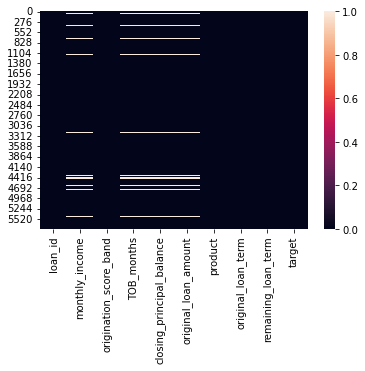

In [228]:
#check missing values
sb.heatmap(risk_drop_delq_history.isnull())

In [229]:
#check attributes
print(risk_drop_delq_history.shape)

(5783, 10)


In [230]:
#drop rows with at least one missing value
risk = risk_drop_delq_history.dropna()

In [231]:
print(risk.shape)

(5406, 10)


In [232]:
risk.head()

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,0


In [233]:
#create dummy columns for product column since its an object. 
productcolumndummy = pd.get_dummies(risk['product'])

In [234]:
#add dummy colume to original column
risk = pd.concat((risk,productcolumndummy), axis=1)

In [235]:
#drop prouct column from the original column

risk = risk.drop(['product'], axis=1)

In [236]:
risk.head()

risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5406 entries, 0 to 5782
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    5406 non-null   int64  
 1   monthly_income             5406 non-null   float64
 2   origination_score_band     5406 non-null   int64  
 3   TOB_months                 5406 non-null   float64
 4   closing_principal_balance  5406 non-null   float64
 5   original_loan_amount       5406 non-null   float64
 6   original_loan_term         5406 non-null   int64  
 7   remaining_loan_term        5406 non-null   int64  
 8   target                     5406 non-null   int64  
 9   A                          5406 non-null   uint8  
 10  B                          5406 non-null   uint8  
 11  C                          5406 non-null   uint8  
 12  D                          5406 non-null   uint8  
dtypes: float64(4), int64(5), uint8(4)
memory usage: 

In [237]:
#seperate the dateframe into X and y data
x = risk.values
y = risk['target'].values

In [238]:
#Delete target column from X
x = np.delete(x,8,axis=1)

In [239]:
x.shape

(5406, 12)

In [240]:
y.shape

(5406,)

## Dataset Split (80/20) Ratio

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [242]:
x_train.shape, y_train.shape

((4324, 12), (4324,))

In [243]:
x_test.shape, y_test.shape

((1082, 12), (1082,))

## Build the Random Forest Method

In [244]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [245]:
x[3]

array([1.003e+03, 2.325e+04, 3.000e+00, 7.600e+01, 3.900e+03, 6.900e+03,
       6.000e+01, 4.800e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00])

In [246]:
print(clf.predict([[1.003e+03, 2.325e+04, 3.000e+00, 7.600e+01, 3.900e+03, 6.900e+03,
       6.000e+01, 4.800e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]]))

[1]


In [247]:
x[0]

array([1.0e+03, 6.0e+03, 5.0e+00, 8.3e+01, 3.0e+02, 1.8e+03, 2.4e+01,
       5.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00])

In [248]:
print(clf.predict([[1.0e+03, 6.0e+03, 5.0e+00, 8.3e+01, 3.0e+02, 1.8e+03, 2.4e+01,
       5.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00]]))

[0]


In [249]:
x[-2]

array([6.248e+03, 9.750e+03, 7.000e+00, 6.000e+00, 7.500e+03, 7.500e+03,
       6.000e+01, 6.500e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])

In [250]:
print(clf.predict([[6.248e+03, 9.750e+03, 7.000e+00, 6.000e+00, 7.500e+03, 7.500e+03,
       6.000e+01, 6.500e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]]))

[1]


## Performs prediction on the test set

In [251]:
print(clf.predict(x_test))

[0 1 0 ... 1 1 0]


In [252]:
print(y_test)

[0 1 0 ... 1 1 0]


## Model Performance

In [253]:
print(clf.score(x_test, y_test))

0.9768946395563771
